In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

file_location = "C:/Users/hanxia/Desktop/BitTiger BA501/Project2/"
file_name = "orders_new.csv"
my_data = pd.read_csv(file_location + file_name)


In [7]:
my_data.head()


,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,US,2017-04-02,12624549,6720123150182430132,49.99,3659561261588336546,ANDROID_APPS
1,US,2017-04-01,12624549,17511438899767627798,0.99,3659561261588336546,ANDROID_APPS
2,US,2017-04-04,12624549,1549342062436664018,39.99,3659561261588336546,ANDROID_APPS
3,US,2017-04-04,12624549,7771425263197855716,19.99,3659561261588336546,ANDROID_APPS
4,US,2017-04-01,12624549,17943210556580942992,19.99,3659561261588336546,ANDROID_APPS


In [8]:
type(my_data.date)

pandas.core.series.Series

In [9]:
type(my_data.date.tolist()[0])

str

In [13]:
my_data.date.tolist()[0:10]

['2017-04-02',
 '2017-04-01',
 '2017-04-04',
 '2017-04-04',
 '2017-04-01',
 '2017-04-01',
 '2017-04-06',
 '2017-04-05',
 '2017-04-06',
 '2017-04-05']

In [22]:
def GetSeries(my_data, my_id):
    table = my_data[["date","spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    return series

my_series = GetSeries(my_data, 12624549)
print (my_series)

date
2017-04-01    54019.941288
2017-04-02    34642.988992
2017-04-03    28645.762133
2017-04-04    27604.259313
2017-04-05    33149.441763
2017-04-06    29310.726245
2017-04-07    34640.122009
Name: spend_usd, dtype: float64


In [26]:
my_data.date = pd.to_datetime(my_data.date, format = '%Y-%m-%d')


In [27]:
type(my_data.date[0])


pandas._libs.tslib.Timestamp

In [28]:
my_series = GetSeries(my_data, 12624549)
my_series.index

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07'],
              dtype='datetime64[ns]', name='date', freq=None)

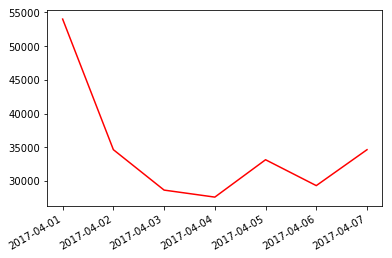

In [30]:
fig, ax = plt.subplots()
ax.plot(my_series, color="red", label="experiment")
plt.gcf().autofmt_xdate()

In [31]:
my_series


date
2017-04-01    54019.941288
2017-04-02    34642.988992
2017-04-03    28645.762133
2017-04-04    27604.259313
2017-04-05    33149.441763
2017-04-06    29310.726245
2017-04-07    34640.122009
Name: spend_usd, dtype: float64

In [14]:
import pandas as pd
import numpy as np
import scipy as sp

import plotly.plotly as py
import plotly.figure_factory as ff

py.plotly.tools.set_credentials_file(username='mingchang0804', api_key='lpbaXASTRzJWvoeGSzbk')
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
py.iplot(table)


In [19]:
import plotly.graph_objs as go

data = [go.Bar(x=df.School,y=df.gap)]

py.iplot(data)

data2 = [go.Scatter(x=df.School,y=df.Men)]
py.iplot(data2)

In [20]:
women = go.Scatter(x=df.School, y=df.Women, line = dict(color = 'red'), name="Women")
men = go.Scatter(x=df.School, y=df.Men, line = dict(color = 'blue'), name="Men")

data3 = [men, women]
py.iplot(data3)


In [23]:


layout = dict(
    title = "Men vs. Women",
    yaxis=dict(
        title='Num'
    ),
    xaxis=dict(title='School Name')
)
fig = dict(data=data3, layout=layout)
py.iplot(fig)



In [24]:
df.std()


Women    12.813683
Men      25.705289
gap      14.137084
dtype: float64

In [25]:
df.mean()


Women     81.095238
Men      113.523810
gap       32.428571
dtype: float64

In [28]:
women = go.Bar(x=df.School, y=df.Women,  name="Women")
men = go.Bar(x=df.School, y=df.Men,  name="Men")
gap = go.Bar(x=df.School, y=df.gap,  name="gap")

data4 = [men, women, gap]
py.iplot(data4)
